<a href="https://colab.research.google.com/github/kabbo642/Image-Captioning/blob/main/image_captioning_model_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the data in the environment

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Image_captioning_model_001"

Flickr8k.token.txt.zip	images.zip


In [ ]:
!unzip "/content/drive/MyDrive/Image_captioning_model_001/images.zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/2844747252_64567cf14a.jpg  
  inflating: images/2844846111_8c1cbfc75d.jpg  
  inflating: images/2844963839_ff09cdb81f.jpg  
  inflating: images/2845246160_d0d1bbd6f0.jpg  
  inflating: images/2845691057_d4ab89d889.jpg  
  inflating: images/2845845721_d0bc113ff7.jpg  
  inflating: images/2846037553_1a1de50709.jpg  
  inflating: images/2846785268_904c5fcf9f.jpg  
  inflating: images/2846843520_b0e6211478.jpg  
  inflating: images/2847514745_9a35493023.jpg  
  inflating: images/2847615962_c330bded6e.jpg  
  inflating: images/2847859796_4d9cb0d31f.jpg  
  inflating: images/2848266893_9693c66275.jpg  
  inflating: images/2848571082_26454cb981.jpg  
  inflating: images/2848895544_6d06210e9d.jpg  
  inflating: images/2848977044_446a31d86e.jpg  
  inflating: images/2849194983_2968c72832.jpg  
  inflating: images/2850719435_221f15e951.jpg  
  inflating: images/2851198725_37b6027625.jpg  
  inflating: images/2851304910_b57211

In [ ]:
!unzip "/content/drive/MyDrive/Image_captioning_model_001/Flickr8k.token.txt.zip"

Archive:  /content/drive/MyDrive/Image_captioning_model_001/Flickr8k.token.txt.zip
  inflating: Flickr8k.token.txt      


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [ ]:
images_path = '/content/images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [ ]:
images[:5]

['/content/images/3500342526_393c739e2f.jpg',
 '/content/images/3526431764_056d2c61dc.jpg',
 '/content/images/3323661814_1e8e1ae88c.jpg',
 '/content/images/2960033435_c20cc7399a.jpg',
 '/content/images/3515358125_9e1d796244.jpg']

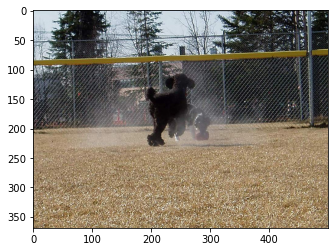

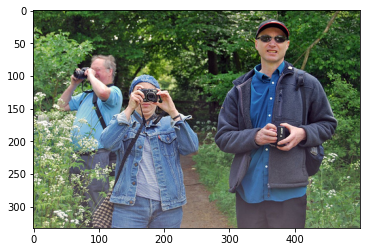

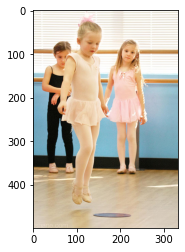

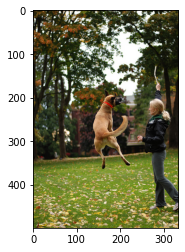

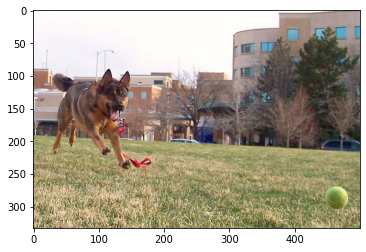

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
!pip install resnet

  Created wheel for resnet: filename=resnet-0.1-py3-none-any.whl size=10041 sha256=35caa2af63f5a3a2017331476d0929d99fda55509f93a501084351cf94c552ff
  Stored in directory: /root/.cache/pip/wheels/38/23/58/6e83e34ced7d4772b88e2e86305f94a1ca497bd87937f5e7ec
Successfully built resnet


In [ ]:
from keras.applications.resnet import ResNet50

incept_model = ResNet50(include_top=True)
incept_model.summary()

102981632/102967424 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [ ]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 2000:
        break
        
    elif count % 100 == 0:
        print(count)
    

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


In [ ]:
len(images_features)

2001

In [ ]:
caption_path = "/content/Flickr8k.token.txt"

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)

40461

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [ ]:
len(captions_dict)

2001

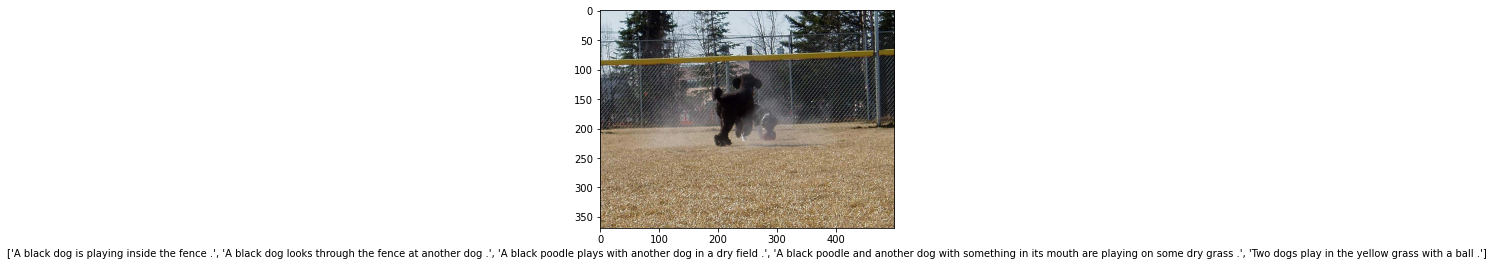

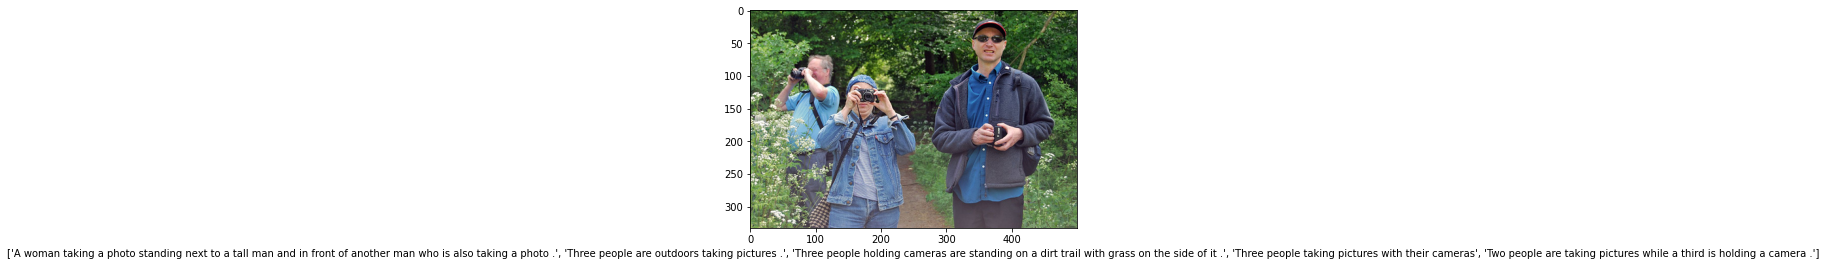

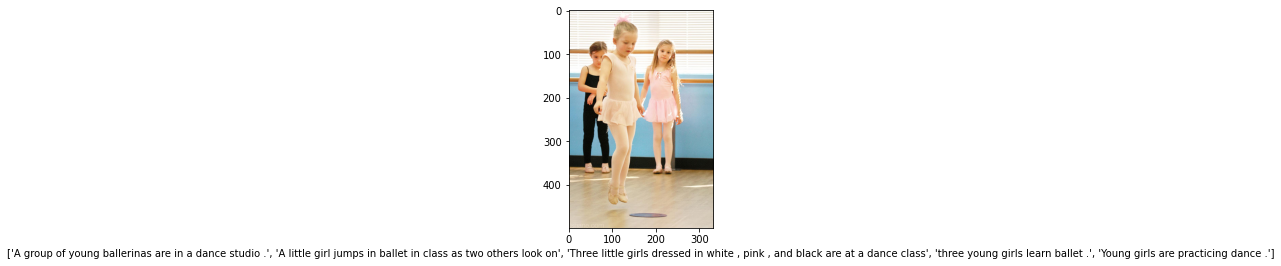

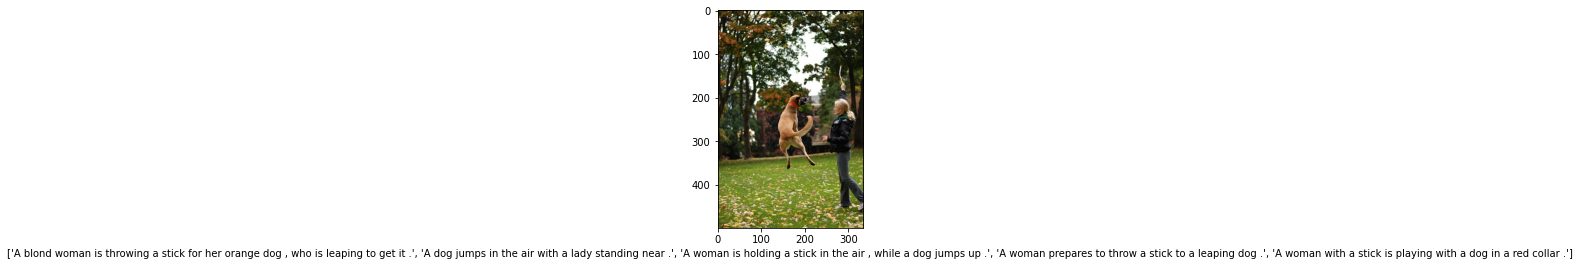

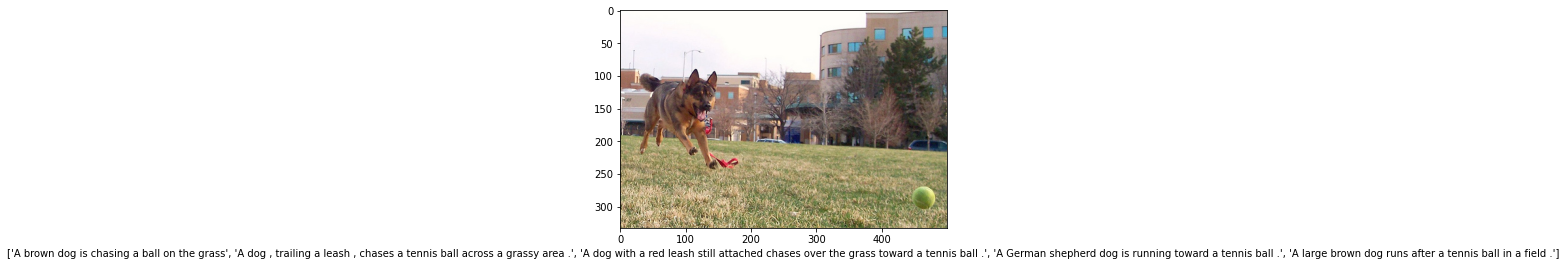

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

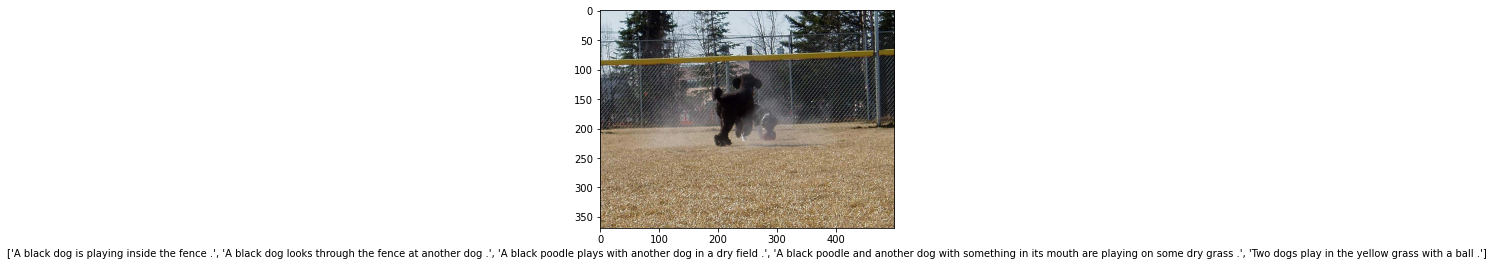

In [ ]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = '/content/images/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
captions_dict

{'1003163366_44323f5815.jpg': ['startofseq a man lays on a bench while his dog sits by him . endofseq',
  'startofseq a man lays on the bench to which a white dog is also tied . endofseq',
  'startofseq a man sleeping on a bench outside with a white and black dog sitting next to him . endofseq',
  'startofseq a shirtless man lies on a park bench with his dog . endofseq',
  'startofseq man laying on bench holding leash of dog sitting on ground endofseq'],
 '1007320043_627395c3d8.jpg': ['startofseq a child playing on a rope net . endofseq',
  'startofseq a little girl climbing on red roping . endofseq',
  'startofseq a little girl in pink climbs a rope bridge at the park . endofseq',
  'startofseq a small child grips onto the red ropes at the playground . endofseq',
  'startofseq the small child climbs on a red ropes on a playground . endofseq'],
 '101669240_b2d3e7f17b.jpg': ['startofseq a man in a hat is displaying pictures next to a skier in a blue hat . endofseq',
  'startofseq a man 

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [ ]:
len(count_words)

4714

In [ ]:
count_words

{'startofseq': 10004,
 'a': 15737,
 'man': 1906,
 'lays': 26,
 'on': 2716,
 'bench': 105,
 'while': 523,
 'his': 652,
 'dog': 1898,
 'sits': 119,
 'by': 298,
 'him': 108,
 '.': 9042,
 'endofseq': 10004,
 'the': 4684,
 'to': 846,
 'which': 10,
 'white': 940,
 'is': 2284,
 'also': 5,
 'tied': 3,
 'sleeping': 15,
 'outside': 168,
 'with': 1977,
 'and': 2203,
 'black': 922,
 'sitting': 320,
 'next': 199,
 'shirtless': 37,
 'lies': 7,
 'park': 113,
 'laying': 60,
 'holding': 353,
 'leash': 28,
 'of': 1653,
 'ground': 93,
 'child': 366,
 'playing': 559,
 'rope': 57,
 'net': 19,
 'little': 434,
 'girl': 789,
 'climbing': 140,
 'red': 595,
 'roping': 1,
 'in': 4664,
 'pink': 167,
 'climbs': 43,
 'bridge': 29,
 'at': 748,
 'small': 278,
 'grips': 0,
 'onto': 54,
 'ropes': 8,
 'playground': 37,
 'hat': 168,
 'displaying': 1,
 'pictures': 27,
 'skier': 59,
 'blue': 574,
 'skis': 26,
 'past': 31,
 'another': 257,
 'paintings': 0,
 'snow': 362,
 'person': 414,
 'wearing': 742,
 'looking': 208,
 'fr

In [ ]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [ ]:
len(new_dict)

4714

In [ ]:
new_dict['<OUT>'] = len(new_dict) 

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
captions_dict = captions_backup.copy()

In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
           encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
captions_dict

{'1003163366_44323f5815.jpg': [[1,
   2,
   3,
   4,
   5,
   2,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14],
  [1, 2, 3, 4, 5, 15, 6, 16, 17, 2, 18, 9, 19, 20, 21, 13, 14],
  [1, 2, 3, 22, 5, 2, 6, 23, 24, 2, 18, 25, 26, 9, 27, 28, 16, 12, 13, 14],
  [1, 2, 29, 3, 30, 5, 2, 31, 6, 24, 8, 9, 13, 14],
  [1, 3, 32, 5, 6, 33, 34, 35, 9, 27, 5, 36, 14]],
 '1007320043_627395c3d8.jpg': [[1, 2, 37, 38, 5, 2, 39, 40, 13, 14],
  [1, 2, 41, 42, 43, 5, 44, 45, 13, 14],
  [1, 2, 41, 42, 46, 47, 48, 2, 39, 49, 50, 15, 31, 13, 14],
  [1, 2, 51, 37, 52, 53, 15, 44, 54, 50, 15, 55, 13, 14],
  [1, 15, 51, 37, 48, 5, 2, 44, 54, 5, 2, 55, 13, 14]],
 '101669240_b2d3e7f17b.jpg': [[1,
   2,
   3,
   46,
   2,
   56,
   19,
   57,
   58,
   28,
   16,
   2,
   59,
   46,
   2,
   60,
   56,
   13,
   14],
  [1, 2, 3, 61, 62, 63, 3, 57, 64, 46, 15, 65, 13, 14],
  [1, 2, 66, 67, 61, 68, 50, 69, 58, 70, 71, 46, 15, 65, 13, 14],
  [1, 2, 59, 72, 50, 69, 58, 46, 15, 65, 28, 16, 73, 13, 14],
  [1, 3

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[1, 2, 3, 4, 5, 15, 6, 16, 17, 2, 18, 9, 19, 20, 21, 13, 14]
[1, 2, 3, 22, 5, 2, 6, 23, 24, 2, 18, 25, 26, 9, 27, 28, 16, 12, 13, 14]
[1, 92, 87, 46, 2, 93, 82, 43, 15, 83, 7, 15, 3, 46, 44, 94, 25, 95, 15, 96, 13, 14]
[1, 2, 97, 25, 98, 99, 100, 101, 102, 11, 15, 103, 100, 27, 28, 16, 2, 104, 24, 2, 105, 11, 106, 13, 14]
[1, 2, 3, 19, 33, 15, 186, 35, 2, 116, 71, 16, 8, 135, 46, 187, 35, 188, 189, 7, 63, 3, 72, 5, 13, 14]
[1, 2, 3, 46, 121, 266, 2, 41, 256, 71, 46, 15, 267, 25, 270, 75, 12, 16, 271, 216, 272, 137, 273, 241, 12, 13, 14]
[1, 2, 256, 357, 46, 660, 338, 25, 2, 44, 198, 331, 5, 2, 232, 24, 133, 100, 18, 25, 60, 670, 25, 2, 402, 393, 221, 12, 13, 14]
[1, 2, 42, 46, 2, 44, 25, 26, 689, 24, 18, 601, 19, 128, 28, 16, 2, 3, 46, 2, 414, 25, 2, 42, 46, 2, 690, 47, 25, 26, 25, 18, 691, 401, 13, 14]


In [ ]:
MAX_LEN

36

In [ ]:
captions_dict

{'1003163366_44323f5815.jpg': [[1,
   2,
   3,
   4,
   5,
   2,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14],
  [1, 2, 3, 4, 5, 15, 6, 16, 17, 2, 18, 9, 19, 20, 21, 13, 14],
  [1, 2, 3, 22, 5, 2, 6, 23, 24, 2, 18, 25, 26, 9, 27, 28, 16, 12, 13, 14],
  [1, 2, 29, 3, 30, 5, 2, 31, 6, 24, 8, 9, 13, 14],
  [1, 3, 32, 5, 6, 33, 34, 35, 9, 27, 5, 36, 14]],
 '1007320043_627395c3d8.jpg': [[1, 2, 37, 38, 5, 2, 39, 40, 13, 14],
  [1, 2, 41, 42, 43, 5, 44, 45, 13, 14],
  [1, 2, 41, 42, 46, 47, 48, 2, 39, 49, 50, 15, 31, 13, 14],
  [1, 2, 51, 37, 52, 53, 15, 44, 54, 50, 15, 55, 13, 14],
  [1, 15, 51, 37, 48, 5, 2, 44, 54, 5, 2, 55, 13, 14]],
 '101669240_b2d3e7f17b.jpg': [[1,
   2,
   3,
   46,
   2,
   56,
   19,
   57,
   58,
   28,
   16,
   2,
   59,
   46,
   2,
   60,
   56,
   13,
   14],
  [1, 2, 3, 61, 62, 63, 3, 57, 64, 46, 15, 65, 13, 14],
  [1, 2, 66, 67, 61, 68, 50, 69, 58, 70, 71, 46, 15, 65, 13, 14],
  [1, 2, 59, 72, 50, 69, 58, 46, 15, 65, 28, 16, 73, 13, 14],
  [1, 3

In [ ]:
Batch_size = 2000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
len(X), len(y_in), len(y_out)


(128724, 128724, 128724)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape, y_in.shape, y_out.shape

In [ ]:
X[1110]

In [ ]:
y_in[2]

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=100)

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model_1.h5')

In [ ]:
model.save_weights('mine_model_1_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [ ]:
for i in range(20):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)